In [1]:
#import all libraries and classes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
#import the dataset
bankdata = pd.read_csv(r"C:\Users\Williams\Desktop\DataScienceWithAiLead\PROJECT\bank_data.csv")

In [3]:
#copy the dataset to another variable
bankdata_new = bankdata.copy()

In [4]:
#check for null columns
bankdata_new.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [5]:
#check the dimension of the dataset
bankdata_new.shape

(41188, 21)

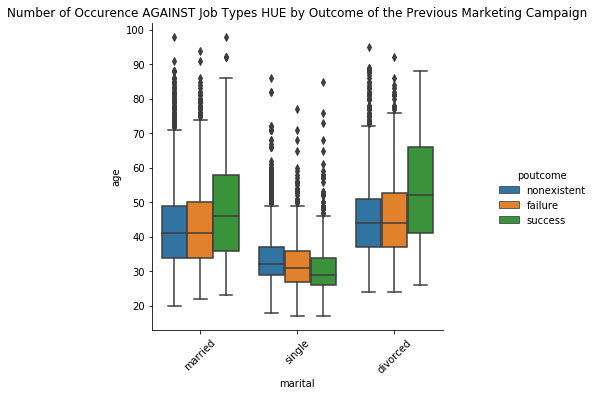

In [6]:
#Visualise "marital" and "age"
sns.catplot(x="marital", y="age", hue="poutcome", data=bankdata_new, kind="box")
plt.title("Number of Occurence AGAINST Job Types HUE by Outcome of the Previous Marketing Campaign")
plt.xticks(rotation=45)
plt.show()

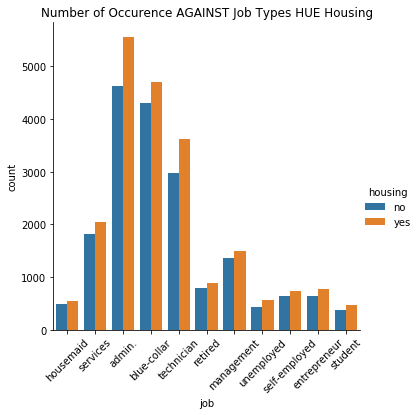

In [7]:
#Visualise "job" and "housing"
sns.catplot(x="job", data=bankdata_new, hue="housing", kind="count")
plt.title("Number of Occurence AGAINST Job Types HUE Housing")
plt.xticks(rotation=45)
plt.show()

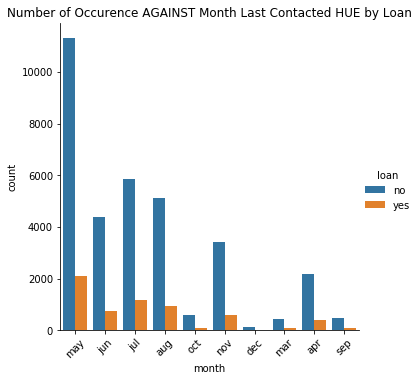

In [8]:
#Visualise "month" and "loan"
sns.catplot(x="month", hue="loan", data=bankdata_new, kind="count")
plt.title("Number of Occurence AGAINST Month Last Contacted HUE by Loan")
plt.xticks(rotation=45)
plt.show()

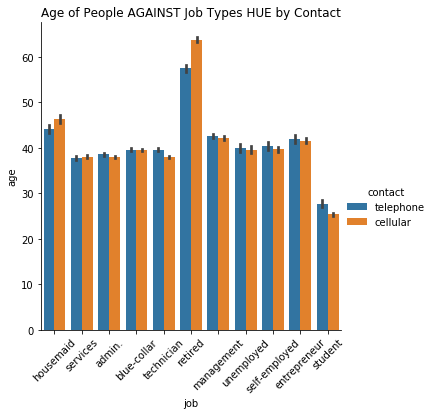

In [9]:
#Visualise "job" and "age"
sns.catplot(x="job", y="age", hue="contact", data=bankdata_new, kind="bar")
plt.title("Age of People AGAINST Job Types HUE by Contact")
plt.xticks(rotation=45)
plt.show()

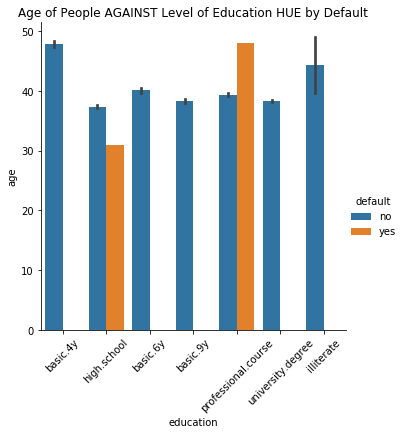

In [10]:
#Visualise "education" and "age"
sns.catplot(x="education", y="age", data=bankdata_new, hue="default", kind="bar")
plt.title("Age of People AGAINST Level of Education HUE by Default")
plt.xticks(rotation=45)
plt.show()

In [11]:
#clean the data

In [12]:
#check the categories of job
bankdata_new["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [13]:
#check the most occurring marital status grouped by job type

In [14]:
bankdata_new.groupby("job").get_group("admin.")["marital"].mode()

0    married
dtype: object

In [15]:
bankdata_new.groupby("job").get_group("blue-collar")["marital"].mode()

0    married
dtype: object

In [16]:
bankdata_new.groupby("job").get_group("technician")["marital"].mode()

0    married
dtype: object

In [17]:
bankdata_new.groupby("job").get_group("services")["marital"].mode()

0    married
dtype: object

In [18]:
bankdata_new.groupby("job").get_group("management")["marital"].mode()

0    married
dtype: object

In [19]:
bankdata_new.groupby("job").get_group("retired")["marital"].mode()

0    married
dtype: object

In [20]:
bankdata_new.groupby("job").get_group("entrepreneur")["marital"].mode()

0    married
dtype: object

In [21]:
bankdata_new.groupby("job").get_group("self-employed")["marital"].mode()

0    married
dtype: object

In [22]:
bankdata_new.groupby("job").get_group("housemaid")["marital"].mode()

0    married
dtype: object

In [23]:
bankdata_new.groupby("job").get_group("unemployed")["marital"].mode()

0    married
dtype: object

In [24]:
bankdata_new.groupby("job").get_group("student")["marital"].mode()

0    single
dtype: object

In [25]:
#fill the null values of each group by its most occurring value
bankdata_new["marital"].update(bankdata_new.groupby("job").get_group("student")["marital"].fillna(value=bankdata_new.groupby("job").get_group("student")["marital"].mode()[0]))
bankdata_new["marital"].fillna(value=bankdata_new.groupby("job").get_group("unemployed")["marital"].mode()[0], inplace=True)

In [26]:
#check the categories of education
bankdata_new["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [27]:
#check the most occurring job category grouped by educational level

In [28]:
bankdata_new.groupby("education").get_group("university.degree")["job"].mode()

0    admin.
dtype: object

In [29]:
bankdata_new.groupby("education").get_group("high.school")["job"].mode()

0    admin.
dtype: object

In [30]:
bankdata_new.groupby("education").get_group("basic.9y")["job"].mode()

0    blue-collar
dtype: object

In [31]:
bankdata_new.groupby("education").get_group("professional.course")["job"].mode()

0    technician
dtype: object

In [32]:
bankdata_new.groupby("education").get_group("basic.4y")["job"].mode()

0    blue-collar
dtype: object

In [33]:
bankdata_new.groupby("education").get_group("basic.6y")["job"].mode()

0    blue-collar
dtype: object

In [34]:
bankdata_new.groupby("education").get_group("illiterate")["job"].mode()

0    blue-collar
dtype: object

In [35]:
#fill the null values of each group by its most occurring value
bankdata_new["job"].update(bankdata_new.groupby("education").get_group("university.degree")["job"].fillna(value=bankdata_new.groupby("education").get_group("university.degree")["job"].mode()[0]))
bankdata_new["job"].update(bankdata_new.groupby("education").get_group("high.school")["job"].fillna(value=bankdata_new.groupby("education").get_group("high.school")["job"].mode()[0]))
bankdata_new["job"].update(bankdata_new.groupby("education").get_group("professional.course")["job"].fillna(value=bankdata_new.groupby("education").get_group("professional.course")["job"].mode()[0]))
bankdata_new["job"].fillna(value=bankdata_new.groupby("education").get_group("basic.9y")["job"].mode()[0], inplace=True)

In [36]:
#check the categories of job
bankdata_new["job"].value_counts()

admin.           10504
blue-collar       9490
technician        6755
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [37]:
#check the most occurring educational level grouped by job category

In [38]:
bankdata_new.groupby("job").get_group("admin.")["education"].mode()

0    university.degree
dtype: object

In [39]:
bankdata_new.groupby("job").get_group("blue-collar")["education"].mode()

0    basic.9y
dtype: object

In [40]:
bankdata_new.groupby("job").get_group("technician")["education"].mode()

0    professional.course
dtype: object

In [41]:
bankdata_new.groupby("job").get_group("services")["education"].mode()

0    high.school
dtype: object

In [42]:
bankdata_new.groupby("job").get_group("management")["education"].mode()

0    university.degree
dtype: object

In [43]:
bankdata_new.groupby("job").get_group("retired")["education"].mode()

0    basic.4y
dtype: object

In [44]:
bankdata_new.groupby("job").get_group("entrepreneur")["education"].mode()

0    university.degree
dtype: object

In [45]:
bankdata_new.groupby("job").get_group("self-employed")["education"].mode()

0    university.degree
dtype: object

In [46]:
bankdata_new.groupby("job").get_group("housemaid")["education"].mode()

0    basic.4y
dtype: object

In [47]:
bankdata_new.groupby("job").get_group("unemployed")["education"].mode()

0    university.degree
dtype: object

In [48]:
bankdata_new.groupby("job").get_group("student")["education"].mode()

0    high.school
dtype: object

In [49]:
#fill the null values of each group by its most occurring value
bankdata_new["education"].update(bankdata_new.groupby("job").get_group("blue-collar")["education"].fillna(value=bankdata_new.groupby("job").get_group("blue-collar")["education"].mode()[0]))
bankdata_new["education"].update(bankdata_new.groupby("job").get_group("technician")["education"].fillna(value=bankdata_new.groupby("job").get_group("technician")["education"].mode()[0]))
bankdata_new["education"].update(bankdata_new.groupby("job").get_group("services")["education"].fillna(value=bankdata_new.groupby("job").get_group("services")["education"].mode()[0]))
bankdata_new["education"].update(bankdata_new.groupby("job").get_group("retired")["education"].fillna(value=bankdata_new.groupby("job").get_group("retired")["education"].mode()[0]))
bankdata_new["education"].fillna(value=bankdata_new.groupby("job").get_group("admin.")["education"].mode()[0], inplace=True)

In [50]:
bankdata[["default", "housing", "loan", "duration"]]

,default,housing,loan,duration
0,no,no,no,261
1,NaN,no,no,149
2,no,yes,no,226
3,no,no,no,151
4,no,no,yes,307
...,...,...,...,...
41183,no,yes,no,334
41184,no,no,no,383
41185,no,yes,no,189
41186,no,no,no,442
